<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.161837,34.265671,28.820706,-0.000115,104.248099,104.248248,-0.000149
1,0.0,1.0,23.924954,83.026039,47.094796,0.000017,164.045807,164.045772,0.000035
2,0.0,2.0,20.112755,32.301647,22.199904,0.000235,84.614542,84.614343,0.000199
3,0.0,3.0,41.620655,96.669268,39.372363,-0.000010,187.662276,187.662266,0.000010
4,0.0,4.0,91.046216,95.987363,31.625110,0.000021,228.658710,228.658688,0.000022
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,90.963784,52.820358,24.780725,0.000088,178.564955,178.564817,0.000139
59996,999.0,56.0,86.909090,55.647988,25.772352,-0.000020,178.329410,178.329384,0.000026
59997,999.0,57.0,25.874820,91.418072,56.591798,0.000011,183.884701,183.884706,-0.000005
59998,999.0,58.0,46.031023,47.702860,85.261203,0.000119,188.995205,188.995070,0.000135


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.161837  34.265671  28.820706  ...  104.248099  104.248248 -0.000149
      1.0    23.924954  83.026039  47.094796  ...  164.045807  164.045772  0.000035
      2.0    20.112755  32.301647  22.199904  ...   84.614542   84.614343  0.000199
      3.0    41.620655  96.669268  39.372363  ...  187.662276  187.662266  0.000010
      4.0    91.046216  95.987363  31.625110  ...  228.658710  228.658688  0.000022
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   90.963784  52.820358  24.780725  ...  178.564955  178.564817  0.000139
      56.0   86.909090  55.647988  25.772352  ...  178.329410  178.329384  0.000026
      57.0   25.874820  91.418072  56.591798  ...  183.884701  183.884706 -0.000005
      58.0   46.031023  47.702860  85.261203  ...  188.995205  188.995070  0.000135
      59.0   68.034740  75.140048  32.641008  ...  185.815779  185.815777  0.000002

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.161837  34.265671  28.820706  ...  104.248099  104.248248 -0.000149
      1.0    23.924954  83.026039  47.094796  ...  164.045807  164.045772  0.000035
      2.0    20.112755  32.301647  22.199904  ...   84.614542   84.614343  0.000199
      3.0    41.620655  96.669268  39.372363  ...  187.662276  187.662266  0.000010
      4.0    91.046216  95.987363  31.625110  ...  228.658710  228.658688  0.000022
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   90.963784  52.820358  24.780725  ...  178.564955  178.564817  0.000139
      56.0   86.909090  55.647988  25.772352  ...  178.329410  178.329384  0.000026
      57.0   25.874820  91.418072  56.591798  ...  183.884701  183.884706 -0.000005
      58.0   46.031023  47.702860  85.261203  ...  188.995205  188.995070  0.000135
      59.0   68.034740  75.140048  32.641008  ...  185.815779  185.815777  0.000002

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.161837,34.265671,28.820706,-0.000115,104.248099,104.248248,-0.000149
1,0.0,1.0,23.924954,83.026039,47.094796,0.000017,164.045807,164.045772,0.000035
2,0.0,2.0,20.112755,32.301647,22.199904,0.000235,84.614542,84.614343,0.000199
3,0.0,3.0,41.620655,96.669268,39.372363,-0.000010,187.662276,187.662266,0.000010
4,0.0,4.0,91.046216,95.987363,31.625110,0.000021,228.658710,228.658688,0.000022
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,90.963784,52.820358,24.780725,0.000088,178.564955,178.564817,0.000139
59996,999.0,56.0,86.909090,55.647988,25.772352,-0.000020,178.329410,178.329384,0.000026
59997,999.0,57.0,25.874820,91.418072,56.591798,0.000011,183.884701,183.884706,-0.000005
59998,999.0,58.0,46.031023,47.702860,85.261203,0.000119,188.995205,188.995070,0.000135


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.161837  34.265671  28.820706  ...  104.248099  104.248248 -0.000149
      1.0    23.924954  83.026039  47.094796  ...  164.045807  164.045772  0.000035
      2.0    20.112755  32.301647  22.199904  ...   84.614542   84.614343  0.000199
      3.0    41.620655  96.669268  39.372363  ...  187.662276  187.662266  0.000010
      4.0    91.046216  95.987363  31.625110  ...  228.658710  228.658688  0.000022
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   90.963784  52.820358  24.780725  ...  178.564955  178.564817  0.000139
      56.0   86.909090  55.647988  25.772352  ...  178.329410  178.329384  0.000026
      57.0   25.874820  91.418072  56.591798  ...  183.884701  183.884706 -0.000005
      58.0   46.031023  47.702860  85.261203  ...  188.995205  188.995070  0.000135
      59.0   68.034740  75.140048  32.641008  ...  185.815779  185.815777  0.000002

[60000 rows x 7 columns]

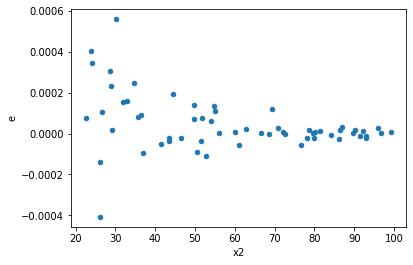

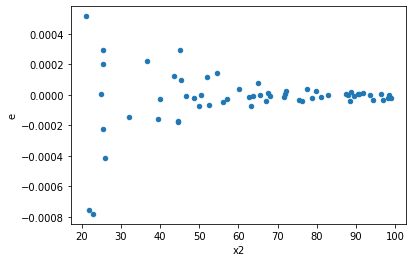

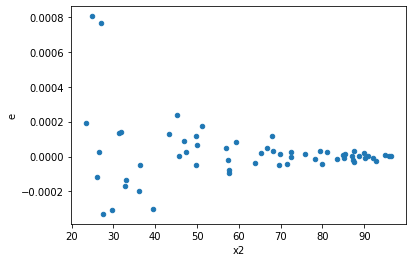

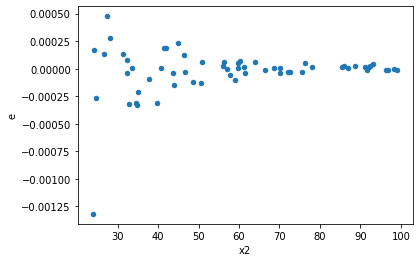

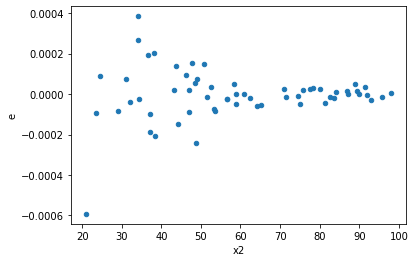

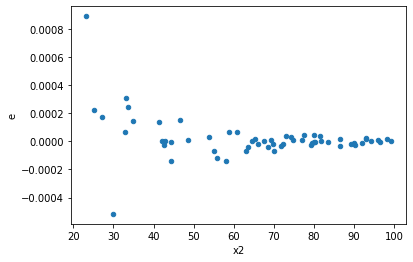

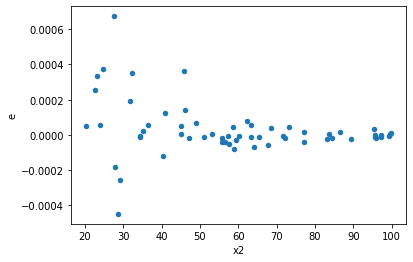

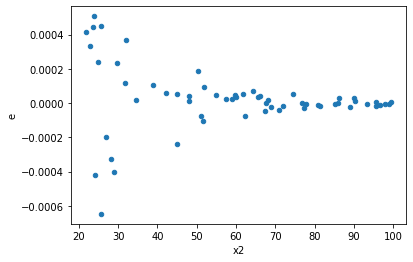

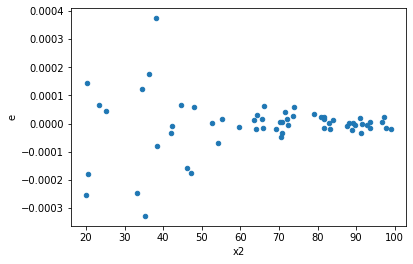

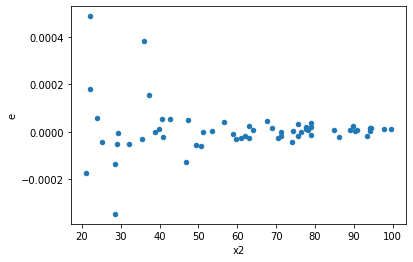

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,31.0,23.0,3.046710066295239e-07,4.974305241871983e-07,1.015570022098413e-08,2.2610478372145377e-08,2.200569868347274,0.041301428908839144,0.9793492855455804,Reject005=0 : Heteroscedasticity
2.0,33.0,21.0,6.905544878734575e-07,3.5996541660984134e-06,2.1579827746045546e-08,1.7998270830492067e-07,8.191387505551182,1.4235321077471497e-07,0.9999999288233946,Reject005=0 : Heteroscedasticity
3.0,29.0,25.0,1.3192000440256415e-07,4.976820986101027e-07,4.711428728663005e-09,2.073675410875428e-08,4.3762220673220185,0.00020944948265388952,0.999895275258673,Reject005=0 : Heteroscedasticity
7.0,29.0,25.0,5.4179242071998266e-08,1.7873460711045486e-06,1.934972931142795e-09,7.447275296268952e-08,38.26781924571886,8.881784197001252e-16,0.9999999999999996,Reject005=0 : Heteroscedasticity
11.0,27.0,27.0,2.026967261886272e-08,1.3380697445077222e-06,7.796027930331816e-10,5.14642209426047e-08,66.013387076737,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
13.0,27.0,27.0,5.095910695826293e-07,1.7894443550681908e-06,1.959965652240882e-08,6.88247828872381e-08,3.511530051996006,0.0017103451286692994,0.9991448274356654,Reject005=0 : Heteroscedasticity
15.0,28.0,26.0,1.2162002393942053e-07,1.1424251149437782e-06,4.504445331089649e-09,4.569700459775113e-08,10.115965530086338,3.64945775821468e-08,0.9999999817527112,Reject005=0 : Heteroscedasticity
24.0,35.0,19.0,5.384401730036654e-08,2.454083434852914e-06,1.5836475676578395e-09,1.3633796860293968e-07,83.95881730653078,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
25.0,32.0,22.0,2.4302133764792527e-08,1.3138809106263203e-06,7.83939798864275e-10,6.256575764887239e-08,78.63916497465104,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,23.0,3.046710066295239e-07,4.974305241871983e-07,1.015570022098413e-08,2.2610478372145377e-08,2.200569868347274,0.041301428908839144,Reject005=0 : Heteroscedasticity
1.0,26.0,28.0,1.2238513197229934e-06,3.8554300819392624e-07,4.895405278891974e-08,1.4279370673849119e-08,0.2925226423544576,0.0019522639288896836,Reject005=0 : Heteroscedasticity
2.0,33.0,21.0,6.905544878734575e-07,3.5996541660984134e-06,2.1579827746045546e-08,1.7998270830492067e-07,8.191387505551182,1.4235321077471497e-07,Reject005=0 : Heteroscedasticity
3.0,29.0,25.0,1.3192000440256415e-07,4.976820986101027e-07,4.711428728663005e-09,2.073675410875428e-08,4.3762220673220185,0.00020944948265388952,Reject005=0 : Heteroscedasticity
4.0,26.0,28.0,1.709974405525455e-06,3.68285301046051e-08,6.83989762210182e-08,1.3640196335038926e-09,0.019999083437105835,5.218529465506444e-17,Reject005=0 : Heteroscedasticity
5.0,29.0,25.0,2.1258723515489193e-06,1.2191140663953134e-07,7.592401255531855e-08,5.079641943313806e-09,0.06652197701278685,1.5387489064407014e-09,Reject005=0 : Heteroscedasticity
6.0,29.0,25.0,8.573948068887441e-07,4.3093868757186554e-08,3.062124310316943e-08,1.795577864882773e-09,0.05830323131969119,3.499288283464336e-10,Reject005=0 : Heteroscedasticity
7.0,29.0,25.0,5.4179242071998266e-08,1.7873460711045486e-06,1.934972931142795e-09,7.447275296268952e-08,38.26781924571886,8.881784197001252e-16,Reject005=0 : Heteroscedasticity
8.0,26.0,28.0,1.0281357773907835e-06,3.11034416067822e-07,4.1125431095631344e-08,1.1519793187697111e-08,0.28091393998168496,0.001402797414689545,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    721
Reject005=1 : Homoscedasticity      279
Name: Result_test, dtype: int64